# Projet Corps 

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
reset()

In [11]:
%display latex

In [12]:
#Définition de l'environnement dans lequel on travaille
PRQ.<X> = PolynomialRing(QQ)

## Polynôme non résoluble par radicaux 

On a : 

$P=X^5- 6X + 3$ un polynôme de $\mathbb Q[X]$


On cherche à montrer qu'il n'est pas résoluble par radicaux.

In [13]:
#On rentre le polynôme 
P = X^5 - 6*X + 3

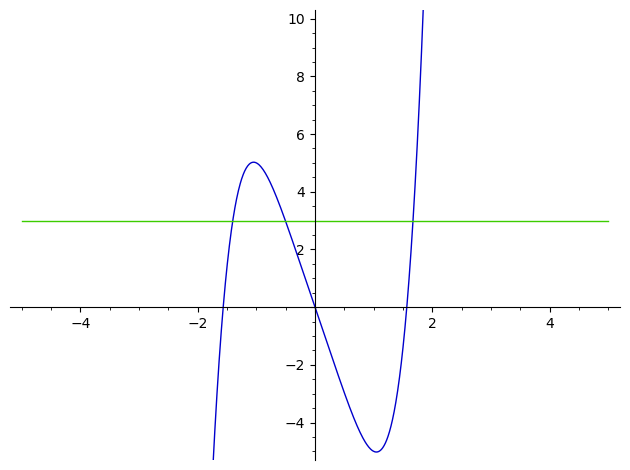

In [14]:
var('x')
P_exp = x^5 - 6*x,+3
plot(P_exp, (x,-5,5),
    ymin=-5,ymax=10)

In [15]:
P.factor()

X^5 - 6*X + 3

par la méthode `.factor()`, on voit que le polynôme $P$ est irréductible.

In [16]:
PRR.<Y> = PolynomialRing(RR)  #On définit une approximation des polynômes rééls

Pr = Y^5 - 6*Y + 3          #On redéfinit P dans les réels pour trouver une approximations des racines réelles si il y en a
Pr.roots()

[(-1.67093526448087, 1), (0.505501230405525, 1), (1.40164187926531, 1)]

On a redéfini $P$ dans $\mathbb R$ et on a extrait les trois racines réelles.

#### On veut montrer que ce sont les seules réelles

In [17]:
#On définit sa dérivée 
dP = 5*Y^4 - 6 

In [18]:
r1 = dP.roots()[0][0]
r2 = dP.roots()[1][0]

(r1,r2)

(-1.04663513939211, 1.04663513939211)

In [19]:
P(r1), P(r2)

(8.02384866908211, -2.02384866908211)

#### Groupe de Galois
On veut d'abord calculer le corps $\frac{\mathbb Q [X] }{(P)_\text{id}}$
On sait que ça sera un corps car $P$ est irréductible.

In [20]:
K.<alpha> = NumberField(P)
print(K)

Number Field in alpha with defining polynomial X^5 - 6*X + 3


In [21]:
G = K.galois_group()
print(G)

Galois group 5T5 (S5) with order 120 of X^5 - 6*X + 3


Il est d'ordre 120, on sait qu'il n'est pas résoluble.

#### Plus généralement 
On veut voir des exemples de :

$P(X)= X^p-p^2 X+ p \in \mathbb Q[X]$ avec $p$ un nombre premier positif.

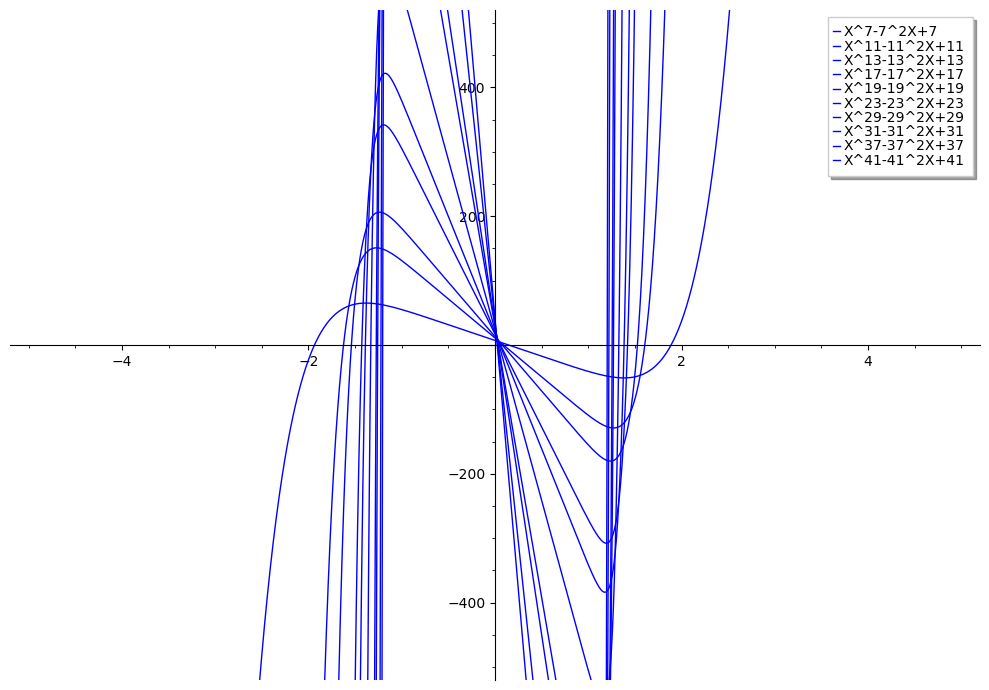

In [47]:
’
tracés = []
for i in list_premiers:
    P_i = x^i - i^2*x +i
    tracé_i = plot(P_i,(x,-5,5),
                   legend_label=f'X^{i}-{i}^2X+{i}',
                  ymin=-500,ymax=500)
    tracés.append(tracé_i)
    
tracé=sum(tracés) 
tracé.show(figsize=(10,7))

In [22]:
def Polynome_p(p):
    if p.is_prime() and p>5 :
        P = X^p - p^2*X +p
        K.<alpha> = NumberField(P)
        G = K.galois_group()
        return([K,G])

In [24]:
for i in list_premiers:
    print(Polynome_p(i))

[Number Field in alpha with defining polynomial X^7 - 49*X + 7, Galois group 7T7 (S7) with order 5040 of X^7 - 49*X + 7]
[Number Field in alpha with defining polynomial X^11 - 121*X + 11, Galois group 11T8 (S11) with order 39916800 of X^11 - 121*X + 11]
[Number Field in alpha with defining polynomial X^13 - 169*X + 13, Galois group of (non-Galois) X^13 - 169*X + 13]
[Number Field in alpha with defining polynomial X^17 - 289*X + 17, Galois group of (non-Galois) X^17 - 289*X + 17]
[Number Field in alpha with defining polynomial X^19 - 361*X + 19, Galois group of (non-Galois) X^19 - 361*X + 19]
[Number Field in alpha with defining polynomial X^23 - 529*X + 23, Galois group of (non-Galois) X^23 - 529*X + 23]
[Number Field in alpha with defining polynomial X^29 - 841*X + 29, Galois group of (non-Galois) X^29 - 841*X + 29]
[Number Field in alpha with defining polynomial X^31 - 961*X + 31, Galois group of (non-Galois) X^31 - 961*X + 31]
[Number Field in alpha with defining polynomial X^37 - 1

C'est très intéressant. En lisant, on remarque que pour $p=7$ et $p=11$, le corps de décomposition est un groupe de Galois non résoluble car le cardinal est le même que $S_7$ et $S_{11}$, que l'on sait non résolubles.
Pour le reste, le corps de décomposition 

## Polynôme résoluble par radicaux

On a $P(X)= X^5-5X+12$ un polynôme de $\mathbb Q [X]$

In [166]:
P = X^5 - 5*X + 12 
P

X^5 - 5*X + 12

In [167]:
P.factor()

X^5 - 5*X + 12

In [168]:
dP = 5*X^4 - 5
(r1,r2) = (dP.roots()[0][0] , dP.roots()[1][0])

In [169]:
(P(r1),P(r2))

(8, 16)

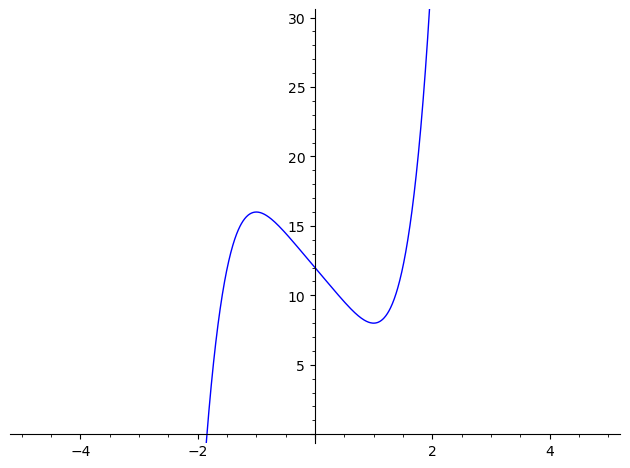

In [170]:
var('x')
P_exp = x^5 - 5*x + 12
plot(P_exp, (x,-5,5),
    ymin=0, ymax=30)

#### Groupe de Galois
On veut d'abord calculer le corps $\frac{\mathbb Q [X] }{(P)_\text{id}}$
On sait que ça sera un corps car $P$ est irréductible.

In [171]:
K.<alpha> = NumberField(P)
print(K)

Number Field in alpha with defining polynomial X^5 - 5*X + 12


In [172]:
G = K.galois_group()
print(G)

Galois group 5T2 (5:2) with order 10 of X^5 - 5*X + 12


C'est un groupe d'ordre 10 ! on sait qu'il est résoluble

In [173]:
list_elem = G.list() #On extrait la liste des éléments du groupe de Galois

On va maintenant construire puis dessiner le graphe du groupe de Galois de ce polynôme :

In [176]:
graphe = nx.Graph()
for elem in list_elem:
    graphe.add_node(elem)
for i in range(len(list_elem)):
    for j in range(i+1,len(list_elem)):
        graphe.add_edge(list_elem[i],list_elem[j])

On dessine le graphe

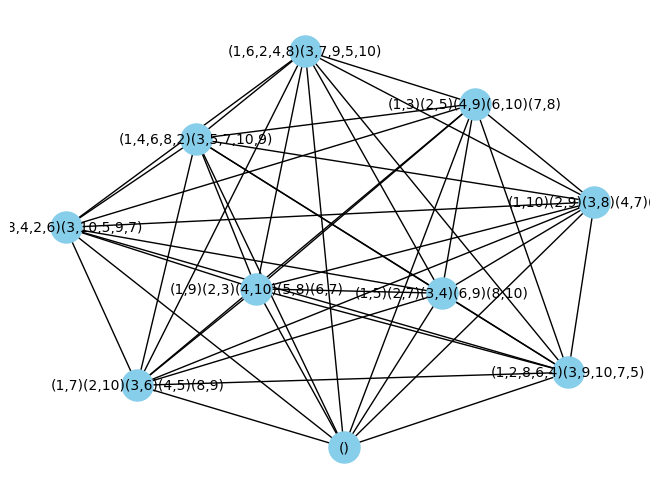

In [177]:
pos = nx.spring_layout(graphe)  # Position des nœuds
nx.draw(graphe, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black')
plt.show()

##### On va maintenant construire le graphe des sous groupes du Groupe de galois de ce polynôme

In [200]:
sousgroupes = G.subgroups() 

In [183]:
graphe = nx.Graph()   #On réinitialise notre graphe, qu'on avait utilisé pour representer le groupe de Galois

In [190]:
for groupe in sousgroupes:
    generateurs = groupe.gens()
    if groupe==sousgroupes[0]:
        label='identité'
    elif groupe==G:
        label='Groupe de Galois'
    else :
        label=','.join([str(gen) for gen in generateurs])
    graphe.add_node(groupe,label=label)

for i in range(len(sousgroupes)):
    for j in range(i+1, len(sousgroupes)):
        if sousgroupes[i].is_subgroup(sousgroupes[j]):
            graphe.add_edge(sousgroupes[i],sousgroupes[j])

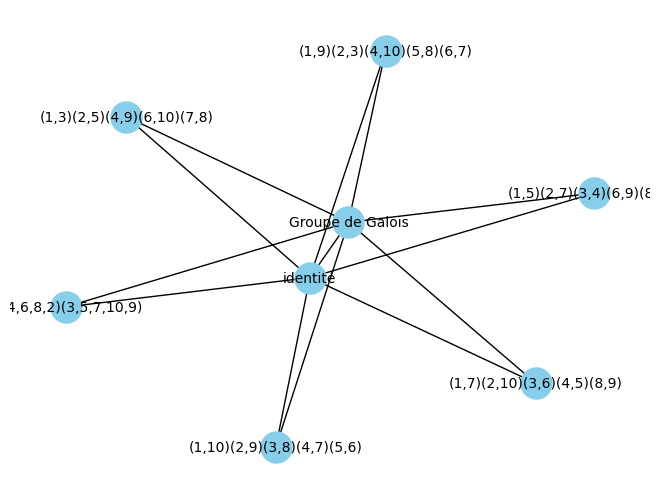

In [199]:
pos = nx.spring_layout(graphe)

labels = {node: data['label'] for node, data in graphe.nodes(data=True)}
nx.draw(graphe, pos, with_labels=False, node_size=500, node_color='skyblue', font_size=10, font_color='black', arrows=True)
nx.draw_networkx_labels(graphe, pos, labels=labels, font_size=10, font_color='black')
plt.show()

On voit qu'elle admet une seule racine réelle